In [1]:
NAMA = "Iqrar Agalosi Nureyza"
NPM = "1806204902"
KOLABORATOR = []
REFERENSI = [
             "https://www.kaggle.com/ahmedterry/disneyland-reviews-nlp-sentiment-analysis",
             "http://www.davidsbatista.net/blog/2018/03/31/SentenceClassificationConvNets/",
             "http://mbenhaddou.com/2019/12/29/convolutional-neural-network-for-text-classification/"
]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import os
%matplotlib inline

In [3]:
# FILE PATH (Ganti path sesuai dengan alamat direktori apabila diperlukan)
DATA_PATH = "/content/drive/MyDrive/Semester 6 - ML/PR3/Disneyland_Reviews.csv"
SHAPE_PATH1 = "/content/drive/MyDrive/Semester 6 - ML/PR3/assets/comment.png"
SHAPE_PATH2 = "/content/drive/MyDrive/Semester 6 - ML/PR3/assets/upvote.png"
SHAPE_PATH3 = "/content/drive/MyDrive/Semester 6 - ML/PR3/assets/downvote.png"
GLOVE_PATH = "/content/drive/MyDrive/Semester 6 - ML/PR3/glove.6B.200d.txt"

# Data Preparation and Preprocessing

In [4]:
df = pd.read_csv(DATA_PATH)
df_backup = df.copy()
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,587393102,5,2017-12,United Kingdom,Great park for all ages. Queues aren't too bad...,Disneyland_California
1,131308350,5,2012-5,United States,There is no better place than the original Dis...,Disneyland_California
2,248989180,5,2014-12,Australia,This was our forth year in a row to visit and ...,Disneyland_Paris
3,326129788,4,2015-11,Australia,"If you've been to Disney parks in the USA, the...",Disneyland_HongKong
4,136057625,5,2012-7,United States,"What can I say, it's Disneyland. We had a grea...",Disneyland_California


In [5]:
df.shape

(34125, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34125 entries, 0 to 34124
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          34125 non-null  int64 
 1   Rating             34125 non-null  int64 
 2   Year_Month         34125 non-null  object
 3   Reviewer_Location  34125 non-null  object
 4   Review_Text        34125 non-null  object
 5   Branch             34125 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [7]:
df["Year_Month"].unique()

array(['2017-12', '2012-5', '2014-12', '2015-11', '2012-7', '2014-7',
       '2016-8', 'missing', '2013-4', '2019-4', '2015-6', '2013-6',
       '2014-3', '2014-2', '2012-3', '2019-1', '2015-2', '2013-12',
       '2017-3', '2015-9', '2014-10', '2017-11', '2014-9', '2017-5',
       '2011-2', '2013-9', '2018-12', '2015-4', '2013-11', '2016-12',
       '2015-1', '2015-8', '2016-10', '2016-5', '2015-5', '2012-1',
       '2017-9', '2014-6', '2016-3', '2017-10', '2017-1', '2016-4',
       '2018-5', '2015-7', '2014-11', '2011-4', '2012-10', '2018-11',
       '2018-9', '2013-7', '2018-1', '2016-6', '2018-4', '2011-12',
       '2014-8', '2017-2', '2012-12', '2015-10', '2012-4', '2011-8',
       '2018-8', '2016-1', '2016-7', '2018-3', '2013-10', '2012-8',
       '2018-10', '2011-5', '2017-6', '2012-2', '2013-1', '2012-9',
       '2016-2', '2011-10', '2016-11', '2019-2', '2013-8', '2017-4',
       '2019-3', '2018-7', '2014-1', '2012-11', '2015-3', '2011-6',
       '2014-4', '2018-6', '2013-3', '2

Ditemukan data `missing` yang bisa dianggap sebagai NaN value.

In [8]:
df.replace("missing", np.nan, inplace=True)
df.isna().sum()

Review_ID               0
Rating                  0
Year_Month           2108
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64

Kita bisa drop data NaN karena sulit untuk menentukan nilai untuk mengisi data tersebut.

In [9]:
df = df.dropna().reset_index()

In [10]:
df.shape

(32017, 7)

In [11]:
# Drop duplikasi data
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

Untuk feature `Year_Month`, kita dapat memecah mereka menjadi feature baru.

In [12]:
tmp = df["Year_Month"].str.split("-", n=1, expand=True)  # expand=True agar mengembalikan DataFrame baru
df["Year"] = tmp[0]
df["Month"] = tmp[1].astype("int64")
df.drop(columns =["Year_Month"], inplace=True) 

Selain itu kita coba untuk menghitung banyak kata yang ada di dalam teks review.


In [13]:
df["Review_Length"]=df["Review_Text"].apply(lambda x:len(x))

In [14]:
df.head(3)

,index,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Year,Month,Review_Length
0,0,587393102,5,United Kingdom,Great park for all ages. Queues aren't too bad...,Disneyland_California,2017,12,303
1,1,131308350,5,United States,There is no better place than the original Dis...,Disneyland_California,2012,5,371
2,2,248989180,5,Australia,This was our forth year in a row to visit and ...,Disneyland_Paris,2014,12,1647


# Explanatory Data Analysis

## Frekuensi data rating

[]

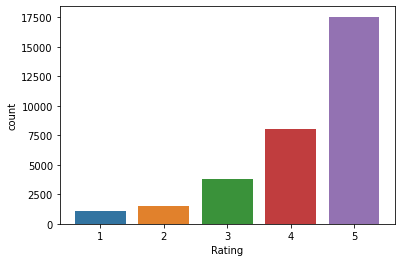

In [15]:
sns.countplot(data=df, x="Rating")
plt.plot()

In [16]:
df["Rating"].value_counts()

5    17554
4     8044
3     3785
2     1537
1     1083
Name: Rating, dtype: int64

Dengan ini kita tahu bahwa mayoritas rating pada data mendapat rating penuh 5/5.

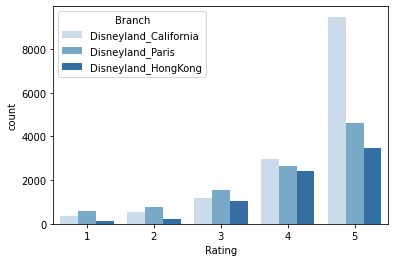

In [17]:
sns.countplot(data=df, x="Rating", hue="Branch", palette="Blues")
plt.show()

Dari countplot yang dibagi berdasarkan cabang Disney, terlihat bahwa Disney cabang California memiliki rating 5 terbanyak disusul oleh Paris dan Hongkong.

## Jumlah review setiap tahunnya

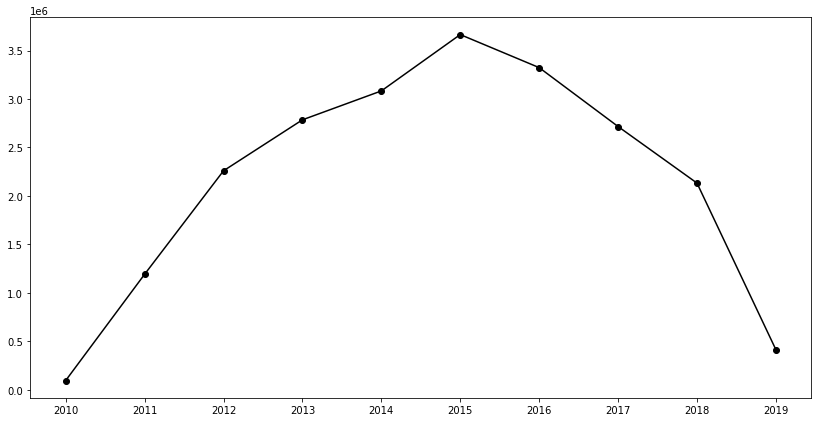

In [20]:
df_tmp = df.groupby('Year', as_index=False).agg({'Review_Length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df_tmp['Year'], df_tmp['Review_Length'], marker='o', label='review length by year', color='black');

Dari banyaknya review yang masuk, tahun 2015 menjadi tahun yang paling banyak menerima review dari orang-orang.

## Banyak review pada setiap cabang per tahunnya 


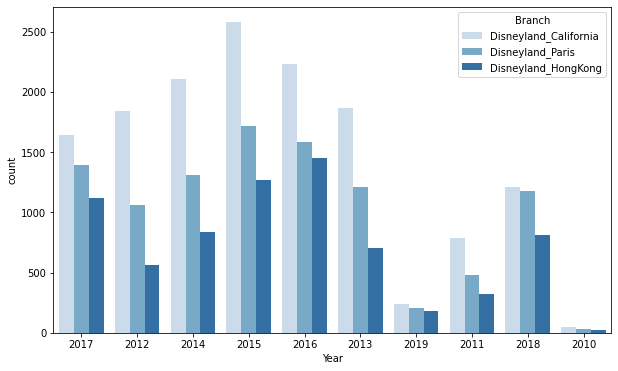

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Year", hue="Branch", palette="Blues")
plt.show()

## Reviews oleh setiap negara

In [ ]:
fig_df=df.groupby("Reviewer_Location", as_index=False).agg({"Branch":"count"}).sort_values("Branch",ascending=False)
fig = px.choropleth(fig_df, 
                    locations="Reviewer_Location", locationmode="country names",
                    color="Branch",
                    color_continuous_scale="portland", hover_data=["Branch"],
                    title="Negara - Reviews")
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Sentiment Analysis

### Feature Engineering

Pada data text yang terkandung komentar, review, pendapat, dan lain-lain, kita dapat menganalisa sentiment dari text tersebut untuk dapat menilai apakah isi text tersebut memiliki sentiment posifit, netral, atau negatif.

In [ ]:
df = df_backup
features = df["Review_Text"].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub("(https?://\S+)", "", str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r"\W", " ", processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r"\s+[a-zA-Z]\s+", " ", processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r"\^[a-zA-Z]\s+", " ", processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r"\s+", " ", processed_feature, flags=re.I)

    # Removing prefixed "b"
    processed_feature = re.sub(r"^b\s+", "", processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
df_tmp = pd.DataFrame()
df_tmp["reviews"] = processed_features

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df_tmp["Subjectivity"] = df_tmp["reviews"].apply(getSubjectivity)
df_tmp["Polarity"] = df_tmp["reviews"].apply(getPolarity)
df_tmp["Analysis"] = df_tmp["Polarity"].apply(getAnalysis)
df_tmp.head()

,reviews,Subjectivity,Polarity,Analysis
0,great park for all ages queues aren too bad co...,0.596402,0.304545,Positive
1,there is no better place than the original dis...,0.384375,0.103125,Positive
2,this was our forth year in row to visit and pr...,0.477549,0.271438,Positive
3,if you ve been to disney parks in the usa then...,0.314105,0.055643,Positive
4,what can say it disneyland we had great time w...,0.475926,0.361111,Positive


Dari sini kita jadi mendapatkan nilai sentiment yang terkandung di dalam setiap review.

In [ ]:
df["sentiment"]=df_tmp["Analysis"]
df["Sentiment"]=df["Rating"].apply(lambda x:"Negative" if x<3 else np.nan)
df["Sentiment"]=df["Sentiment"].fillna(df["sentiment"])
df["Reviews_Text"]=df_tmp["reviews"]

df.drop(["sentiment","Review_ID"], axis=1, inplace=True)

In [ ]:
df_copy = df.copy()
df.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Reviews_Text
0,5,2017-12,United Kingdom,Great park for all ages. Queues aren't too bad...,Disneyland_California,Positive,great park for all ages queues aren too bad co...
1,5,2012-5,United States,There is no better place than the original Dis...,Disneyland_California,Positive,there is no better place than the original dis...
2,5,2014-12,Australia,This was our forth year in a row to visit and ...,Disneyland_Paris,Positive,this was our forth year in row to visit and pr...
3,4,2015-11,Australia,"If you've been to Disney parks in the USA, the...",Disneyland_HongKong,Positive,if you ve been to disney parks in the usa then...
4,5,2012-7,United States,"What can I say, it's Disneyland. We had a grea...",Disneyland_California,Positive,what can say it disneyland we had great time w...


### Sentiment untuk setiap cabang Disney

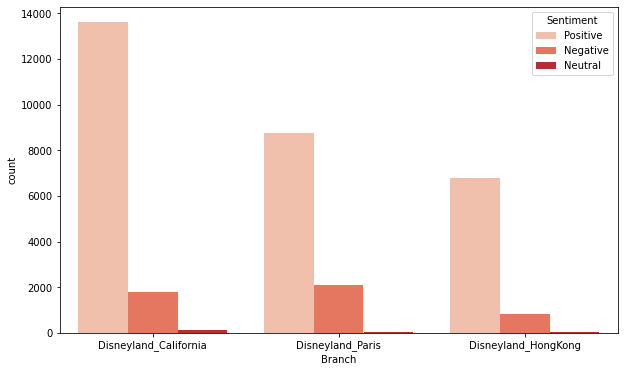

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Branch", hue="Sentiment", palette="Reds");

Ditemukan bahwa review positive mendominasi untuk setiap cabang Disney.

### Word Cloud

In [ ]:
from wordcloud import WordCloud
from PIL import Image

**Word Cloud dari semua review.**

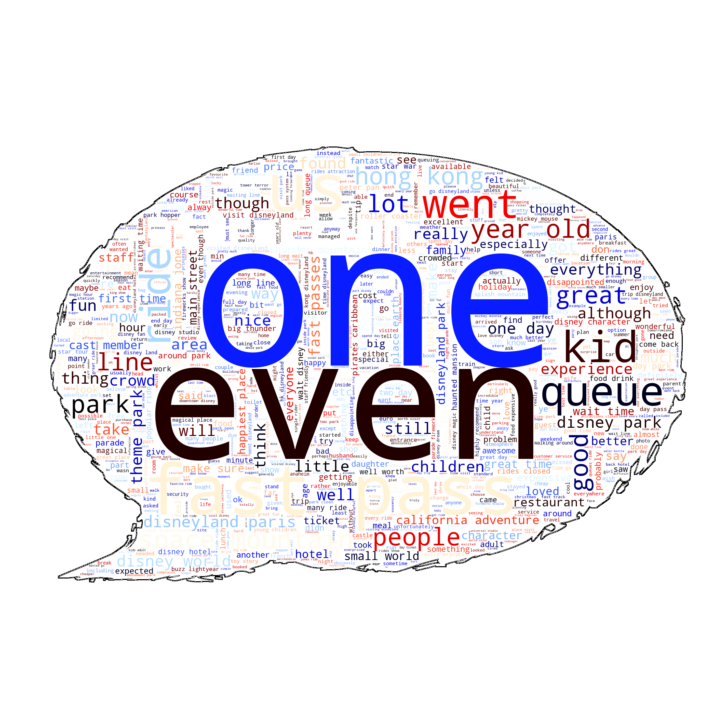

In [ ]:
df["Reviews_Text"] = df["Reviews_Text"].astype("str")
Reviews_Text = " ".join(txt for txt in df.Reviews_Text)

c_mask = np.array(Image.open(SHAPE_PATH1))

wc = WordCloud(background_color="white", mask=c_mask, mode="RGB",
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color="black",colormap="flag")
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

**Word Cloud dari semua review positif.**

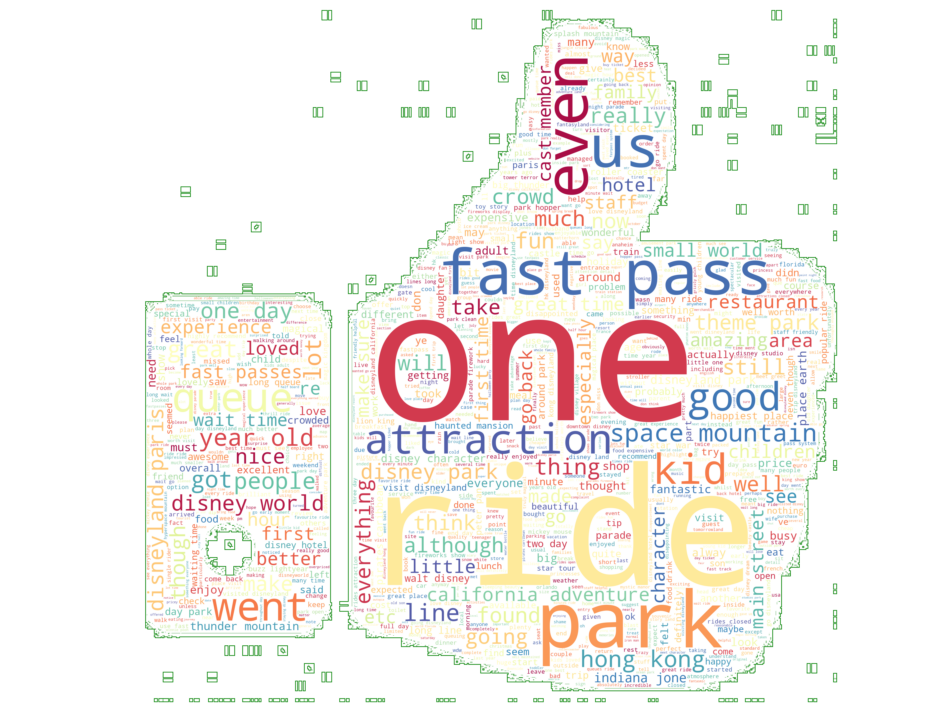

In [ ]:
df_like = df.loc[df["Sentiment"]=="Positive"]

Reviews_Text = " ".join(insul for insul in df_like.Reviews_Text)

l_mask = np.array(Image.open(SHAPE_PATH2))

wc = WordCloud(background_color="white", mask=l_mask, mode="RGB",
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color="green",colormap="Spectral")
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

**Word Cloud dari review negatif.**

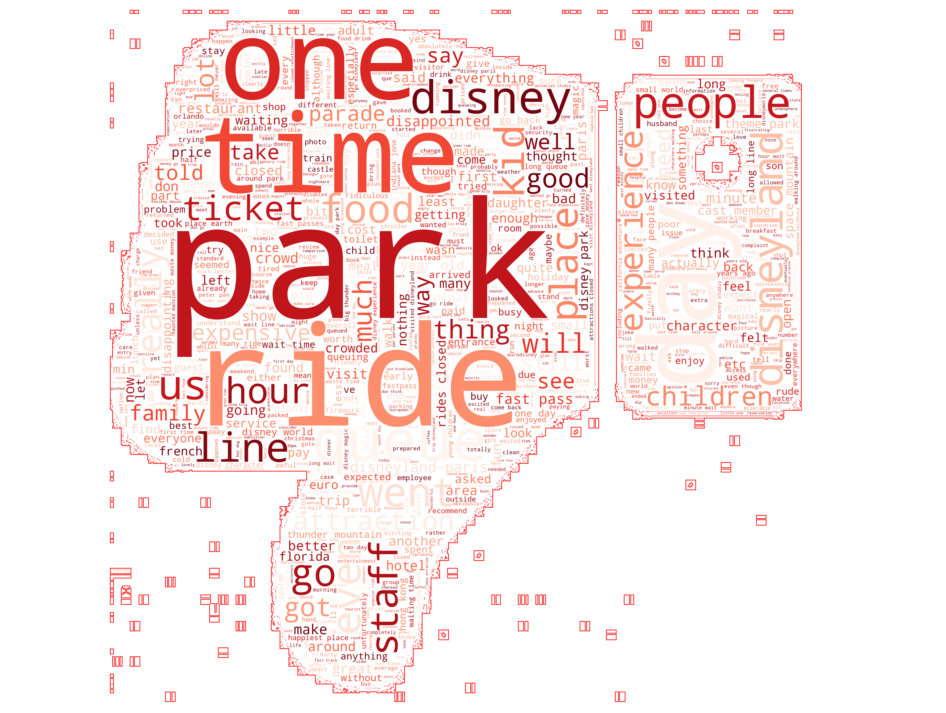

In [ ]:
df_dislike = df.loc[df["Sentiment"]=="Negative"]

Reviews_Text = " ".join(insul for insul in df_dislike.Reviews_Text)

l_mask = np.array(Image.open(SHAPE_PATH3))

wc = WordCloud(background_color="white", mask=l_mask, mode="RGB",
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color="red",colormap="Reds")
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

# Modelling

Berdasarkan data yang sudah kita miliki, maka pemodelan akan menargetkan feature `rating` untuk diprediksi. Di sini kita akan menggunakan CNN untuk memprediksi rating yang didapat berdasarkan review yang diberikan oleh pengunjung.

Model CNN yang dibentuk memiliki ....

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.initializers import Constant
from tensorflow.keras import regularizers
import tensorflow as tf

from sklearn.model_selection import train_test_split

## Preprocessing

In [ ]:
df["Rating"].value_counts()

5    18551
4     8612
3     4045
2     1698
1     1219
Name: Rating, dtype: int64

Secara dasar, kita melihat imbalanced data di sini. Kita sama rata kan dengan mengikuti data minoritas.

In [ ]:
df_1 = df[df['Rating'] == 1].sample(frac=1)
df_2 = df[df['Rating'] == 2].sample(frac=1)
df_3 = df[df['Rating'] == 3].sample(frac=1)
df_4 = df[df['Rating'] == 4].sample(frac=1)
df_5 = df[df['Rating'] == 5].sample(frac=1)

sample_size = 3000

data = pd.concat([df_1.head(sample_size), df_2.head(sample_size), df_3.head(sample_size), df_4.head(sample_size), df_5.head(sample_size)]).sample(frac=1)

Sekarang kita lihat bagaimana rerata, panjang maks, dan standar deviasi dari jumlah kata per review.

In [ ]:
data["Review_Length"] = data["Review_Text"].apply(lambda x:len(x))
print("mean length of sentence: " + str(data.Review_Length.mean()))
print("max length of sentence: " + str(data.Review_Length.max()))
print("std dev length of sentence: " + str(data.Review_Length.std()))

mean length of sentence: 796.1084165477889
max length of sentence: 17358
std dev length of sentence: 891.0653398637487


In [ ]:
# Kita ambil panjang sequence yang akan diambil mendekati rata-rata
sequence_length = 800

In [ ]:
max_features = 20000  # this is the number of words we care about

tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>')
tokenizer.fit_on_texts(data['Reviews_Text'].values)

# this takes our sentences and replaces each word with an integer
X = tokenizer.texts_to_sequences(data['Reviews_Text'].values)

# we then pad the sequences so they're all the same length (sequence_length)
X = pad_sequences(X, sequence_length)

y = pd.get_dummies(data['Rating']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print("test set size " + str(len(X_test)))

test set size 1192


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 25352 unique tokens.


In [ ]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

20001


In [ ]:
embeddings_index = {}
f = open(GLOVE_PATH)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## Training

In [ ]:
embedding_dim = 200
num_filters = 100

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
inputs = Input(shape=(sequence_length,), dtype='int32')

embedding_layer = Embedding(num_words,
                            embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=sequence_length,
                            trainable=True)(inputs)

reshape = Reshape((sequence_length, embedding_dim, 1))(embedding_layer)

# relu activation
conv_0 = Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)

dropout = Dropout(0.5)(flatten)
output = Dense(units=5, activation='softmax')(dropout)

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 800)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 800, 200)     4000200     input_4[0][0]                    
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 800, 200, 1)  0           embedding_3[0][0]                
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 798, 1, 100)  60100       reshape_3[0][0]                  
____________________________________________________________________________________________

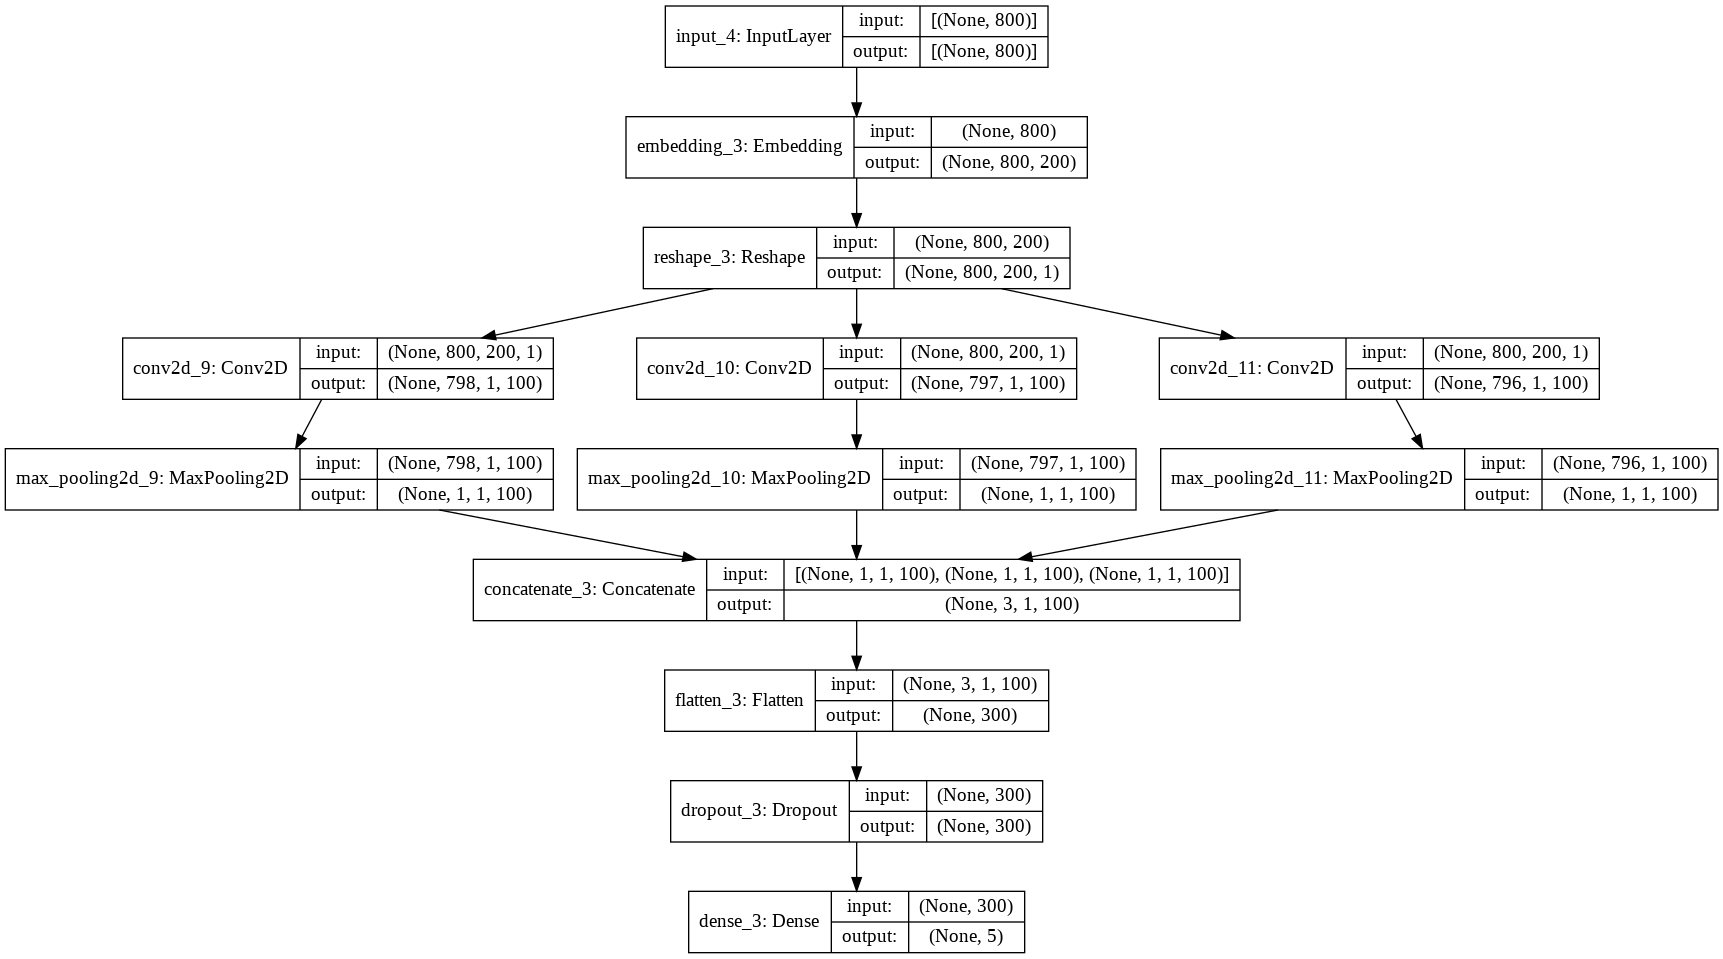

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
batch_size = 32
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/30
269/269 [==============================] - 21s 76ms/step - loss: 2.0213 - accuracy: 0.2584 - val_loss: 1.7434 - val_accuracy: 0.2867
Epoch 2/30
269/269 [==============================] - 20s 74ms/step - loss: 1.7209 - accuracy: 0.2570 - val_loss: 1.7108 - val_accuracy: 0.2625
Epoch 3/30
269/269 [==============================] - 20s 75ms/step - loss: 1.6976 - accuracy: 0.2670 - val_loss: 1.7004 - val_accuracy: 0.2793
Epoch 4/30
269/269 [==============================] - 20s 75ms/step - loss: 1.6988 - accuracy: 0.2839 - val_loss: 1.7273 - val_accuracy: 0.2587
Epoch 5/30
269/269 [==============================] - 20s 74ms/step - loss: 1.7212 - accuracy: 0.3131 - val_loss: 1.7278 - val_accuracy: 0.3464
Epoch 6/30
269/269 [==============================] - 20s 75ms/step - loss: 1.7113 - accuracy: 0.3416 - val_loss: 1.6737 - val_accuracy: 0.3655
Epoch 7/30
269/269 [==============================] - 20s 74ms/step - loss: 1.7055 - accuracy: 0.3678 - val_loss: 1.7240 - val_accuracy:

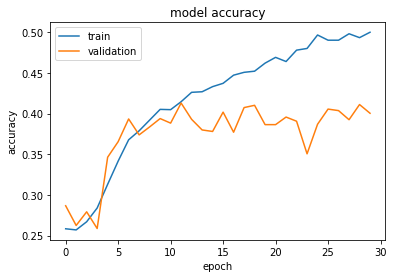

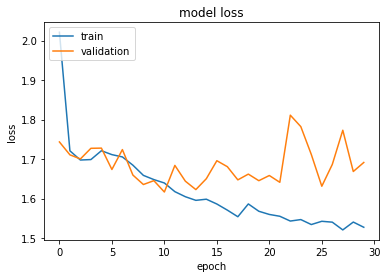

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_hat = model.predict(X_test)

accuracy_score(list(map(lambda x: np.argmax(x), y_test)), list(map(lambda x: np.argmax(x), y_hat)))

0.40604026845637586

In [ ]:
model_structure = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_structure)
 
model.save_weights("cnn_weights.h5")